# Homework 9.5 - Coding

This is the coding portion of the homework assignment for Section 9.5

In [21]:
from typing import Callable
import numpy as np
from numpy.fft import fft
from matplotlib import pyplot as plt

In [22]:
### ------------ ALGORITHM 9.1 FROM THE BOOK ------------ ###
# --------- Annotated and type hinted for clarity --------- #
def cheb_interp(
    f: Callable[[np.ndarray], np.ndarray],
    n: int
) -> np.ndarray:
    """Compute the coefficients of the degree-n Chebyshev
    interpolation of f at the extremizers y_k=cos(k pi/n)."""
    y = np.cos((np.pi * np.arange(2*n)) / n)   # Chebyshev extremizers
    samples = f(y)        # Evaluate function at Chebyshev extremizers

    # Get coefficients of Chebyshev polynomials that make
    # up interpolating polynomial of f(x) by using Theorem 9.5.1
    # (weird coefficients here because numpy's fft is missing 1/2n
    # scaling factor, so we must do it and combine it with the gamma_k
    # coefficient)
    coeffs = np.real(fft(samples))[:n+1] / n 
    coeffs[0] /= 2 
    coeffs[n] /= 2 

    # Return the coefficients of the Chebyshev polynomial
    return coeffs

## Problem 9.32

First, code up a method that returns the value of $T_k(x)$, the k'th Chebyshev polynomial, for a given input $x$. 

**Hint**: Extrapolate a formula from (1) Proposition 9.3.1 from the monic Chebyshev polynomials, and (2) the equation right under the beginning of Section 9.3.3 for converting between the monic Chebyshev polynomials and the "normal" Chebyshev polynomials.

In [23]:
def Tk(k: int, x: float) -> float:
    """Returns the value of the k'th Chebyshev polynomial"""
    return np.cos(k * np.arccos(x))

Next, code up a function `eval_cheby_combination()` that accepts an array of coefficients $[a_0, a_1, \ldots, a_n]$ and a floating point number $x$, and returns the linear combination 
$$\sum_{k=0}^{n} a_k T_k(x) $$

**Hint:** Use your function `Tk()` from above to help evaluate this linear combination.

In [24]:
def eval_cheby_combination(
    a: np.ndarray,
    x: float
) -> float:
    """Returns the value of the linear combination of
    Chebyshev polynomials
    a_0 T0(x) + a_1 T1(x) + ... + a_n Tn(x)

    Args:
        a (np.ndarray): An array of coefficients [a_0, ..., a_n]
        x (float): The point to evaluate the linear combination
            of functions at

    Returns:
        float: The value of the linear combination evaluated
            at the point x
    """
    return sum([a[k] * Tk(k, x) for k in range(len(a))])

Now, let $f(x)$ be the function defined piecewise as
$$f(x) = \begin{cases}
1 + x & \text{ if } x < 0 \\
x & \text{ if } x \geq 0
\end{cases}$$
on the interval $[-1,1]$.

Do the following for $k = 1, 2, \ldots, 7$:

1. Use the function `cheb_interp()` to get the Chebyshev coefficients $[a_0, \ldots, a_{2^k-1}]$ for the interpolating polynomial of $f$ of degree $n=2^k$
2. Use these coefficients and the points inside the plotting linspace `x_plot` as inputs to `eval_cheby_combination()` to actually evaluate this interpolating polynomial for plotting
3. Plot this Chebyshev interpolating polynomial
4. Also plot $f(x)$ on the same plot.
5. Title your plot with the degree of interpolating polynomial $2^k$
6. Show the plot

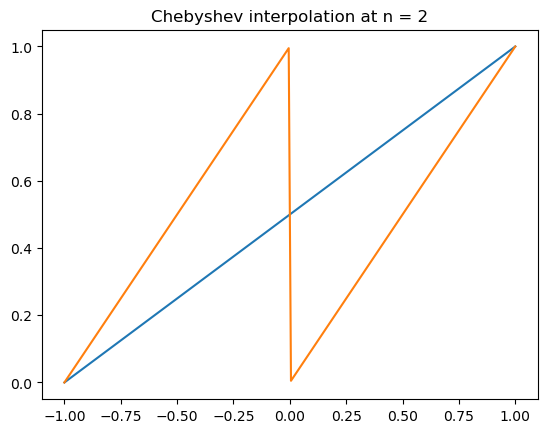

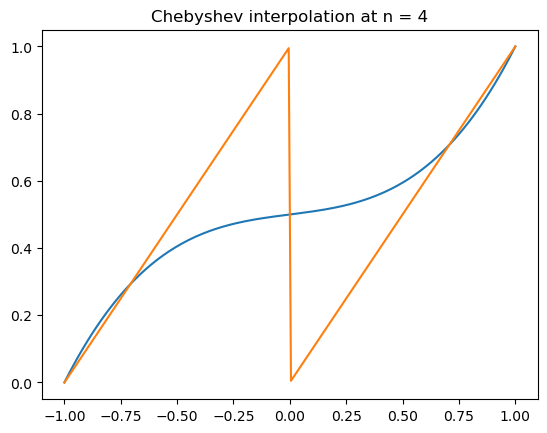

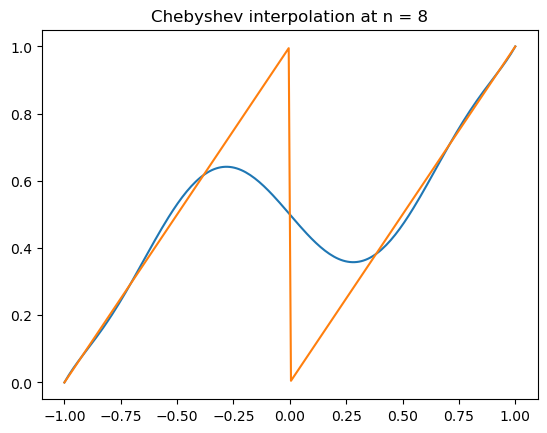

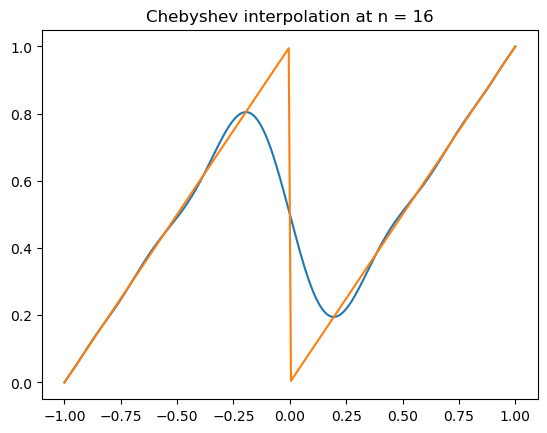

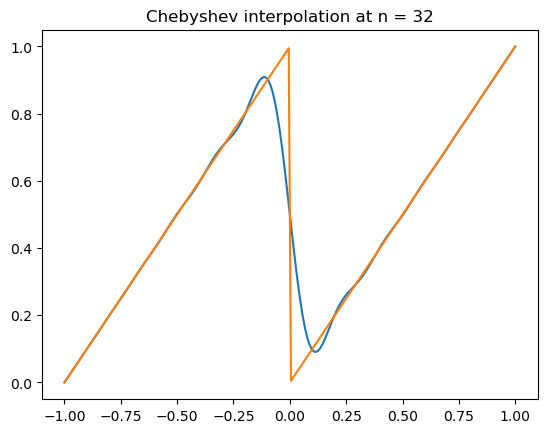

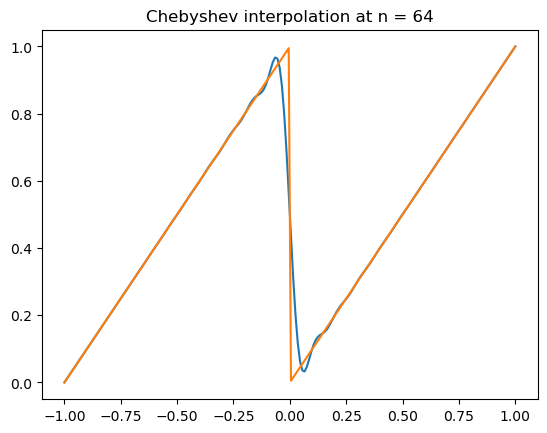

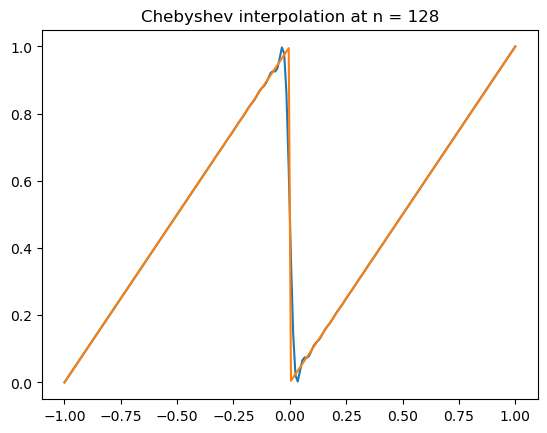

In [25]:
# The function from the problem
def f(x: float | np.ndarray) -> float | np.ndarray:
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: 1+x, lambda x: x])

x_plot = np.linspace(-1, 1, 200)        # Linspace for plotting
k_vals = np.arange(1,8)
for k in k_vals:
    coeffs = cheb_interp(f, 2**k)
    y_plot = []
    for x in x_plot:
        y_plot.append(eval_cheby_combination(coeffs, x))
    plt.figure()
    plt.plot(x_plot, y_plot, label="Cheby Approx")
    plt.plot(x_plot, f(x_plot), label="f(x)")
    plt.title(f"Chebyshev interpolation at n = {2**k}")
    plt.show()

---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.